# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_data_folder = "output_data"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [11]:
new_cities = []
lat = []
lng = []
mxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

print("--------------------------")
print("Begining Data Retrieval")
print("--------------------------")

response_counter = 1

#Loop through cities to find data
for city in cities:
        
    #Use exceptions while searching for city data
    try:
        response = (requests.get(url + "&q=" + city)).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        mxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_cities.append(city)
        print(f'Processing number {response_counter} of {len(cities)} | {city}')
        response_counter += 1
        # Add a one second interval between queries to stay within API query limits
        time.sleep(2)
        
    except KeyError:
        print("City not found. Skipping...")
        response_counter += 1
        pass
    
print('---------------------------')
print('Data Retreival Complete')
print('---------------------------')

--------------------------
Begining Data Retrieval
--------------------------
City not found. Skipping...
Processing number 2 of 599 | georgetown
City not found. Skipping...
Processing number 4 of 599 | samarai
Processing number 5 of 599 | ankang
Processing number 6 of 599 | hambantota
Processing number 7 of 599 | nanortalik
Processing number 8 of 599 | busselton
Processing number 9 of 599 | cayenne
Processing number 10 of 599 | oranjemund
Processing number 11 of 599 | uige
City not found. Skipping...
Processing number 13 of 599 | severo-kurilsk
Processing number 14 of 599 | punta arenas
Processing number 15 of 599 | provideniya
Processing number 16 of 599 | nikolskoye
Processing number 17 of 599 | kapaa
Processing number 18 of 599 | rikitea
Processing number 19 of 599 | lorengau
Processing number 20 of 599 | cockburn town
Processing number 21 of 599 | arraial do cabo
Processing number 22 of 599 | necochea
Processing number 23 of 599 | omboue
Processing number 24 of 599 | jamestown
Pro

Processing number 211 of 599 | hirara
Processing number 212 of 599 | acarau
Processing number 213 of 599 | chicama
Processing number 214 of 599 | inuvik
Processing number 215 of 599 | vanavara
Processing number 216 of 599 | leningradskiy
Processing number 217 of 599 | northam
Processing number 218 of 599 | hithadhoo
Processing number 219 of 599 | calama
Processing number 220 of 599 | villefranche-sur-saone
Processing number 221 of 599 | touros
Processing number 222 of 599 | fortuna
Processing number 223 of 599 | saint-francois
Processing number 224 of 599 | santa isabel do rio negro
City not found. Skipping...
Processing number 226 of 599 | weston
Processing number 227 of 599 | ancud
Processing number 228 of 599 | nuuk
Processing number 229 of 599 | talnakh
Processing number 230 of 599 | radeberg
Processing number 231 of 599 | wanning
Processing number 232 of 599 | toora-khem
Processing number 233 of 599 | edd
Processing number 234 of 599 | ust-tsilma
Processing number 235 of 599 | sao

Processing number 419 of 599 | crawfordsville
Processing number 420 of 599 | sur
Processing number 421 of 599 | craig
Processing number 422 of 599 | pangody
Processing number 423 of 599 | quatre cocos
Processing number 424 of 599 | broken hill
Processing number 425 of 599 | puerto del rosario
Processing number 426 of 599 | olafsvik
Processing number 427 of 599 | nyurba
Processing number 428 of 599 | liverpool
Processing number 429 of 599 | douglas
City not found. Skipping...
Processing number 431 of 599 | kerouane
Processing number 432 of 599 | kabare
Processing number 433 of 599 | avera
Processing number 434 of 599 | ostrogozhsk
Processing number 435 of 599 | shizunai
Processing number 436 of 599 | cap malheureux
Processing number 437 of 599 | boa vista
Processing number 438 of 599 | kaupanger
Processing number 439 of 599 | uruzgan
Processing number 440 of 599 | berdigestyakh
Processing number 441 of 599 | pangai
Processing number 442 of 599 | metro
Processing number 443 of 599 | bud


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Create a DF 
weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Temperature": mxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data_df = pd.DataFrame(weather_dict)

#Save DataFrame as CSV
pd.DataFrame.to_csv(weather_data_df, '../weather_data_df.csv')

#Display DF
weather_data_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,86.00,66,20,5.82,MY,1596031223
1,samarai,-10.62,150.67,77.14,85,99,17.25,PG,1596031513
2,ankang,32.68,109.02,75.00,51,100,1.01,CN,1596031515
3,hambantota,6.12,81.12,84.20,74,20,8.05,LK,1596031518
4,nanortalik,60.14,-45.24,46.72,93,100,9.91,GL,1596031520


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
weather_data_humidity = weather_data_df.loc[weather_data_df["Humidity"] > 100]
weather_data_humidity

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

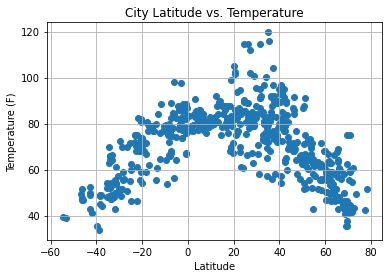

In [14]:
#Plot latitude vs temperature and save as .png
plt.scatter(weather_data_df['Lat'], weather_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

## Latitude vs. Humidity Plot

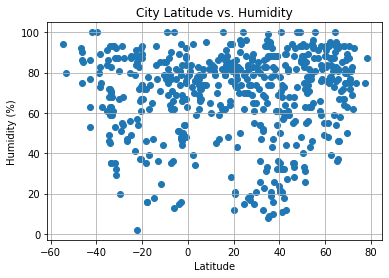

In [15]:
#Plot latitude vs humidity and save as .png
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

## Latitude vs. Cloudiness Plot

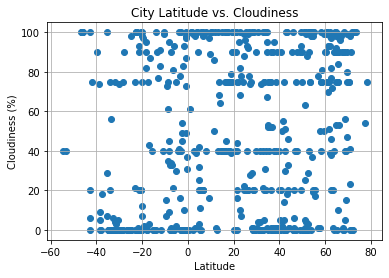

In [16]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("lat_cloudiness.png", bbox_inches="tight")

## Latitude vs. Wind Speed Plot

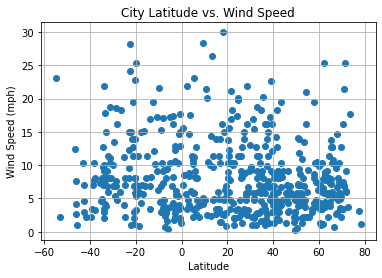

In [17]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("lat_wind_speed.png", bbox_inches="tight")

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[pd.to_numeric(weather_data_df["Lat"]).astype(float) > 0, :]
southern_df = weather_data_df.loc[pd.to_numeric(weather_data_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.55x + 94.38
The r-squared is: -0.6936615795841592


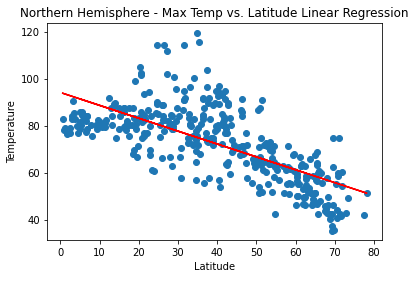

In [20]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.83x + 83.55
The r-squared is: 0.8117770952574022


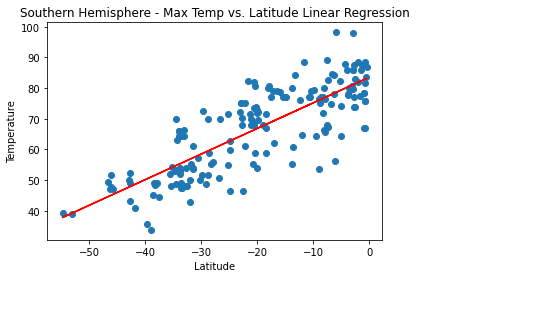

In [21]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.08x + 66.49


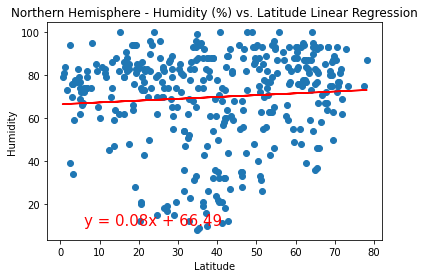

In [22]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.19x + 63.68
The r-squared is: -0.12388434166563742


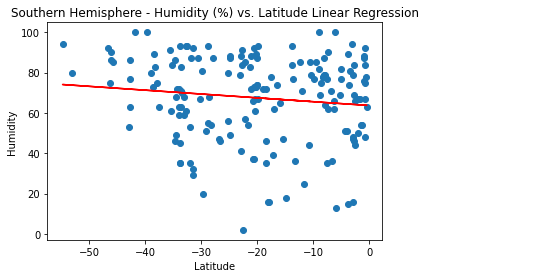

In [23]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.11x + 46.51
The r-squared is: 0.05783645891437513


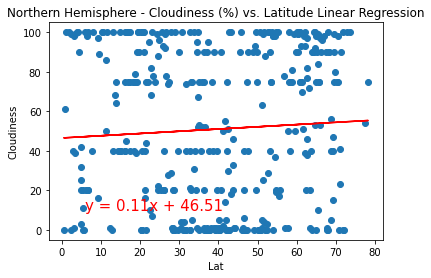

In [24]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 43.43
The r-squared is: 0.1132346970500169


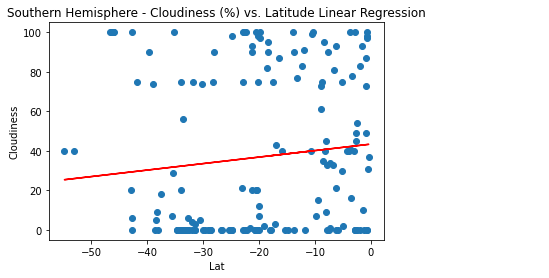

In [25]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 9.2
The r-squared is: -0.1332956372403935


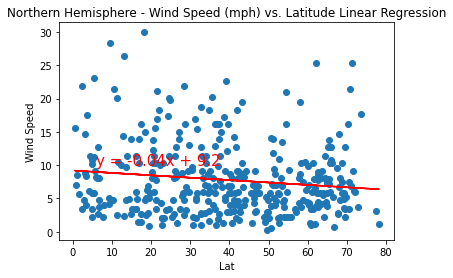

In [26]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.01x + 8.23
The r-squared is: -0.03426774111938155


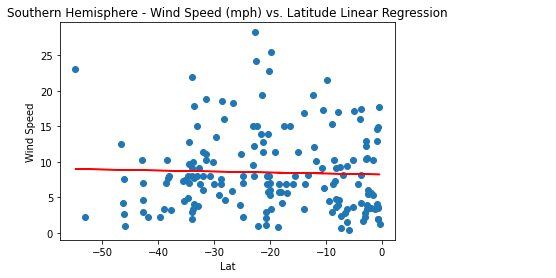

In [27]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()